In [19]:
# importing the necessary python Libraries
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder



In [ ]:
# Here, the dataset is a ready cleaned data
# the new dataset to work with
# Read the CSV new file
df = pd.read_csv("car_purchasing.csv")

# the code below removes all the duplicate
df.drop_duplicates(keep=False, inplace=True)

In [3]:
df.head()

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net_worth,car_purchase_amount
0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [4]:
# this checked to ensure there are no duplicates
df.duplicated().sum()

np.int64(0)

<Axes: >

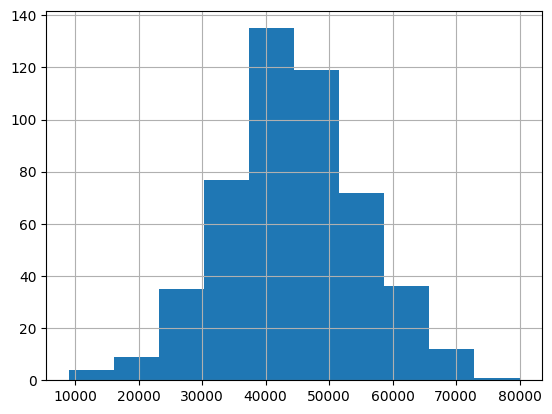

In [5]:
# this shows the histogram of 
# targeted variable "car_purchase_amount"
df["car_purchase_amount"].hist()

In [6]:
df.columns

Index(['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net_worth',
       'car_purchase_amount'],
      dtype='object')

In [7]:
# the train/test 
# X = the other variables that make the dataset
# and y which is the targeted variable
X = df[['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net_worth']]

y = df['car_purchase_amount']

c:\Users\User\AdvancedData2024\AdvDataAnalytics2024\venv310\lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in divide
  score = 1.0 / lap_score - 1


<Axes: >

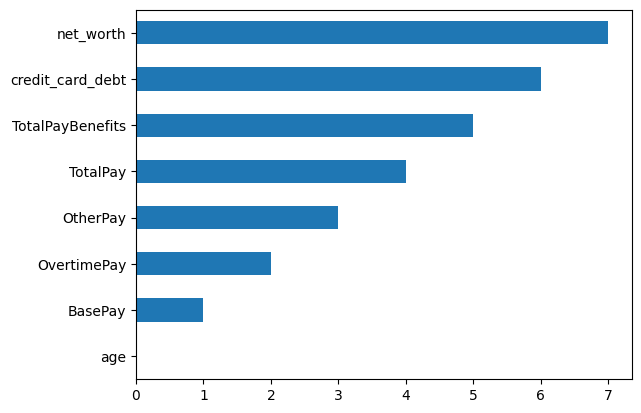

In [ ]:
# Oh wow! It is so interesting that 'age'
# is the least important features. 
# Shocked to say the least.
# And follow by BasePay.
# Surprisely, net_worth is the most important here
# Next is credit_card_debit and 
# then TotalPayBenefits which I think was so 
# because of the other pays features.
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

In [9]:
# the SelectKBest method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
7,net_worth,34708322.18
3,OtherPay,21485830.81
2,OvertimePay,20117023.91
1,BasePay,6449389.98
5,TotalPayBenefits,2724925.69
4,TotalPay,2724925.69
6,credit_card_debt,622680.56
0,age,686.57


<h4>The two methods above - Fisher_score and SelectKBest score both have similarity which shows that 'net_worth' was the most important and 'age' the least important feature. And the next is 'TotalPayBenefits' and 'TotalPay' which I believe is due to the multlicollinearity variables</h4>

In [10]:

X = df.drop("car_purchase_amount", axis=1)
y = df['car_purchase_amount']


# Step 1: Scale the features for autoencoder
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 2: Define and train the autoencoder model
input_dim = X_scaled.shape[1]  # Number of features
autoencoder = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(64, activation='relu'),  # Hidden layer 3
    Dense(input_dim, activation='linear')  # Output layer (reconstruction)
])

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, verbose=1)

c:\Users\User\AdvancedData2024\AdvDataAnalytics2024\venv310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.9897 
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8545
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5455
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2691
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1240
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0614
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0357
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0249 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0133
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.00897
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072
Epoch 16/50
16/1

In [ ]:
# Here, it detect anomalies using the autoencoder
# and then removed the them
reconstructed = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.square(X_scaled - reconstructed), axis=1)

# Define anomaly threshold (e.g., top 5% reconstruction error)
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

# anomalies threshold, this case top 5% is considered noise etc.
threshold = np.percentile(reconstruction_error, 95)

# get anomalies / noise etc.
anomalies = reconstruction_error > threshold
anomaly_indices = np.where(anomalies)[0]

# get the noisy/anomaly rows
anomaly_mask = df.index.isin(anomaly_indices)

df[anomaly_mask]

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net_worth,car_purchase_amount
0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.38,238961.25,35321.46
4,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.71,560304.07,55915.46
7,50,256576.96,0.00,51322.50,307899.46,307899.46,10985.70,629312.40,47434.98
11,53,99722.00,87082.62,110804.30,297608.92,297608.92,10014.97,293862.51,42288.81
17,48,140546.87,119397.26,18625.08,278569.21,278569.21,12514.52,549443.59,43901.71
19,59,257510.59,880.16,16159.50,274550.25,274550.25,13272.95,566022.13,54827.52
53,37,140546.88,73207.61,28988.36,242742.85,242742.85,11216.89,583523.08,46381.13
71,56,92782.61,5477.62,135684.25,233944.48,233944.48,5627.80,411831.04,49373.38
76,53,174872.64,16876.74,40258.39,232007.77,232007.77,16732.31,344916.18,41357.18
80,33,172529.08,0.00,58776.96,231306.04,231306.04,6147.92,441527.01,38399.46


In [12]:
# typical X/y -split
X = df.drop("car_purchase_amount", axis=1)
y = df['car_purchase_amount']

# a good idea: if you are going to use e.g. XGBoost for your actual ML model later
# use XGBoost also here, so that you get the optimal variables from the point of view of XGBoost
model = RandomForestRegressor()

# create RFE, place the model and choose amount of optimal variables
rfe = RFE(estimator=model, n_features_to_select=7)

# fit the RFE model with our data
rfe.fit(X, y)

# get rankings and the results
rankings = rfe.ranking_
support = rfe.support_

# build a new DataFrame just to show results of RFE
results_df = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rankings,
    "Selected": support
}).sort_values(by="Ranking")

# these results accompanied with any other knowledge you
# have regarding dataset (other analysis tools but also domain knowledge)
# you can decide the most important variables
results_df

,Feature,Ranking,Selected
0,age,1,True
1,BasePay,1,True
2,OvertimePay,1,True
3,OtherPay,1,True
5,TotalPayBenefits,1,True
6,credit_card_debt,1,True
7,net_worth,1,True
4,TotalPay,2,False


In [13]:
# Assuming 'lr_results_df' contains the RFE results for LinearRegression
# Extract the selected features based on RFE
selected_features = results_df[results_df["Selected"] == True]["Feature"].tolist()

In [15]:
# Prepare the dataset with selected features
X_selected = X[selected_features]
y = df["car_purchase_amount"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = RandomForestRegressor()
lr_model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
# Make predictions on the test set
# y_pred = lr_model.predict(X_test)
test_predictions = lr_model.predict(X_test)

In [17]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "%")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "%^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "%")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
5172.78 %

MSE
39876952.58 %^2

RMSE:
6314.82 %

R-squared:
0.63

Explained variance score:
0.63


<h4>I think the model performs moderately well, which shows 63% of the variance in car purchase amounts. However, the large error metrics in MAE, MSE, and RMSE indicate room for improvement, suggesting that predictions deviate significantly from the actual values.</h4>